# Analyze Data

## Summarize Data

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import numpy as np
import pandas as pd
from acquire_prepare import acquire_oil
from acquire_prepare import prep_data

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import sys # used in command to make entire array print by default
# from matplotlib import cm
# import seaborn as sns
# import plotly.plotly as py
# import plotly.tools as tls
# import cufflinks as cf
# print('cufflinks version ', cf.__version__)
# import plotly.graph_objs as go

# # Modeling
import xgboost as xgb
# from scipy.spatial.distance import cdist
# from scipy.cluster.vq import kmeans2, whiten
# from sklearn.cluster import KMeans
# from sklearn import metrics
# import math
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler
# from scipy import stats
# from scipy.stats import ttest_ind
# from pandas.tools.plotting import scatter_matrix
# from matplotlib.ticker import FormatStrFormatter

# # Though the following import is not directly being used, it is required
# # for 3D projection to work
# from mpl_toolkits.mplot3d import Axes3D
# pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = acquire_oil()
df = prep_data(df)
df.shape

(14296, 31)

### Data Structure

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14296 entries, 0 to 19495
Data columns (total 31 columns):
api14                 14296 non-null int64
type                  14296 non-null category
status                14296 non-null category
major_phase           14296 non-null category
formation             14282 non-null object
proppant_ppf          11109 non-null float64
prod_method           14296 non-null category
frac_fluid_gpf        12632 non-null float64
lateral_len           14296 non-null float64
frac_stages           13203 non-null float64
frac_fluid_type       14136 non-null category
first_prod            14296 non-null datetime64[ns]
last_prod             14296 non-null datetime64[ns]
oil_gravity           13960 non-null float64
peak_boepd            14296 non-null float64
oil_hist              14296 non-null float64
gas_hist              14296 non-null float64
gor_hist              14296 non-null float64
ip90_boeqpd           14296 non-null float64
landing_depth         141

In [4]:
df.sample(10)

,api14,type,status,major_phase,formation,proppant_ppf,prod_method,frac_fluid_gpf,lateral_len,frac_stages,...,sur_long,well_id,mid_point_lat,mid_point_long,recovery,recovery_per_foot,months_active,recovery_per_month,lateral_class,vintage
6813,42301318310000,Horizontal,Active,OIL,BONE SPRING,357.159821,Flowing,282.270721,4211.0,0.0,...,-103.527266,146135,31.678685,-103.532323,134.915840,32.038908,75,1798.877868,five,2012
350,42003442270000,Horizontal,Active,OIL,WICHITA-ALBANY /LM/,536.485200,Pumping,1352.787350,4054.0,0.0,...,-102.823823,141972,32.150631,-102.825572,164.652345,40.614787,75,2195.364604,five,2012
9087,42329345390000,Vertical,Inactive,OIL,WOLFCAMP,201.742630,Flowing,522.252000,746.0,0.0,...,-102.195169,155010,31.675290,-102.195169,30.026833,40.250447,66,454.952020,one,2001
4079,42173373580000,Horizontal,Active,OIL,WOLFCAMP,1707.697000,Gas Lift,2242.014650,9757.0,0.0,...,-101.758968,144752,32.043666,-101.762729,109.717172,11.244970,25,4388.686881,ten,2017
12146,42383005710000,Vertical,Inactive,OIL,SPRABERRY,NaN,Pumping,116.000000,180.0,NaN,...,-101.643080,95654,31.546910,-101.643080,13.669167,75.939815,149,91.739374,one,2006
14536,42383389310000,Vertical,Inactive,OIL,SPRABERRY,97.000000,Pumping,57.000000,1302.0,NaN,...,-101.673430,96947,31.452010,-101.673430,133.069500,102.203917,233,571.113734,two,1993
439,42003457760000,Horizontal,Active,OIL,WOLFCAMP,517.031900,Flowing,816.483765,7574.0,33.0,...,-102.236014,142461,32.422611,-102.232845,158.684000,20.951149,58,2735.931034,eight,2014
6223,42235353170000,Horizontal,Active,OIL,WOLFCAMP,716.739300,Flowing,960.364136,7802.0,0.0,...,-101.203756,143632,31.161834,-101.202607,260.890672,33.438948,67,3893.890627,eight,2013
18385,42475309050100,Horizontal,Active,OIL,BONE SPRING,191.887726,Flowing,202.296280,2663.0,0.0,...,-103.421190,150292,31.633016,-103.417051,106.623011,40.038682,99,1077.000111,three,2010
6548,42235360070000,Horizontal,Active,OIL,WOLFCAMP,2355.092000,Flowing,2580.493650,7767.0,49.0,...,-101.206343,143916,31.113237,-101.206689,76.351836,9.830287,26,2936.609083,eight,2016


### Data Distributions

In [5]:
print (df.apply(lambda x: x.nunique()))

api14                 14110
type                      2
status                    2
major_phase               3
formation               158
proppant_ppf          10839
prod_method               9
frac_fluid_gpf        12007
lateral_len            6507
frac_stages              65
frac_fluid_type          10
first_prod              613
last_prod               420
oil_gravity             191
peak_boepd            13441
oil_hist              13835
gas_hist              13890
gor_hist              14288
ip90_boeqpd           13905
landing_depth          5523
sur_lat               13739
sur_long              13931
well_id               14296
mid_point_lat         14024
mid_point_long        14040
recovery              14268
recovery_per_foot     14286
months_active           548
recovery_per_month    14174
lateral_class            14
vintage                  63
dtype: int64


In [6]:
df.describe()

,api14,proppant_ppf,frac_fluid_gpf,lateral_len,frac_stages,oil_gravity,peak_boepd,oil_hist,gas_hist,gor_hist,...,sur_lat,sur_long,well_id,mid_point_lat,mid_point_long,recovery,recovery_per_foot,months_active,recovery_per_month,vintage
count,1.429600e+04,1.110900e+04,1.263200e+04,14296.000000,13203.000000,13960.000000,14296.000000,14296.000000,14296.000000,14296.000000,...,14296.000000,14296.000000,14296.000000,14296.000000,14296.000000,14296.000000,14296.000000,14296.00000,1.429600e+04,14296.000000
mean,4.223231e+13,2.520249e+03,2.270928e+03,4450.691172,2.345073,2.369823,433.768964,117.092846,353.266946,3624.554841,...,31.736117,-102.155923,140660.385702,31.736393,-102.156022,156.064940,290.383328,83.63878,inf,2008.671027
std,9.252818e+11,7.814804e+04,7.224983e+04,3080.750736,7.953784,10.532518,458.014546,114.421508,439.196906,3682.286976,...,0.524101,0.817215,19189.867170,0.523995,0.817193,171.941061,2893.484376,95.72090,NaN,10.785789
min,3.000521e+13,2.531144e-01,0.000000e+00,1.000000,0.000000,0.000000,0.071233,0.002000,0.000000,0.000000,...,30.447167,-104.359908,22866.000000,30.447167,-104.360243,0.000000,0.000000,0.00000,0.000000e+00,1955.000000
25%,4.221936e+13,3.473373e+02,1.696318e+02,1648.000000,0.000000,0.000000,67.085300,28.539000,57.232500,1312.337918,...,31.406636,-102.664388,142462.750000,31.407253,-102.663184,37.714875,14.607253,34.00000,4.864058e+02,2007.000000
50%,4.232935e+13,1.088491e+03,8.871019e+02,4297.500000,0.000000,0.000000,300.103020,87.125500,214.022500,2338.980225,...,31.673757,-101.947739,147071.500000,31.673797,-101.948136,109.708172,26.224108,54.00000,1.946208e+03,2013.000000
75%,4.238339e+13,1.529800e+03,1.539429e+03,7196.000000,0.000000,0.000000,666.694100,171.421750,483.171250,4528.676095,...,31.975046,-101.545523,151976.250000,31.978161,-101.546227,198.176208,53.436852,83.25000,4.349936e+03,2015.000000
max,4.250137e+13,7.646000e+06,7.497903e+06,13815.000000,70.000000,68.000000,9358.215000,1659.710000,4692.163000,19977.940000,...,33.834820,-100.689460,157521.000000,33.836550,-100.691821,999.305470,122724.254500,747.00000,inf,2018.000000


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
# makes entire array print by default, can add [:##] to end to set length
np.set_printoptions(threshold=sys.maxsize)

In [9]:
len(df.columns) # 31 features

31

## Visualize Data

### Attribute Histograms

#### XGBoost

In [10]:
xgb_df = df.select_dtypes('number')
xgb_df.drop(columns=['oil_hist', 'api14', 'well_id', 
                     'sur_long', 'sur_lat', 
                     'mid_point_lat', 'mid_point_long'],
            inplace=True)

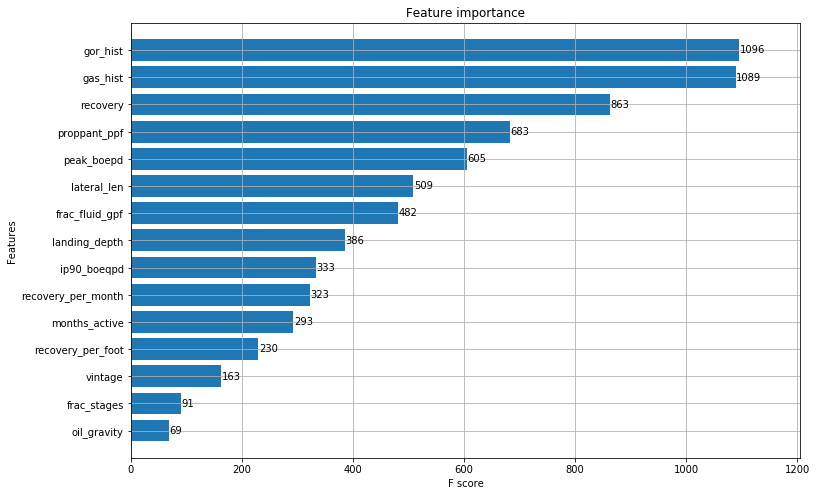

In [11]:
xgb_params = {
    'max_depth': 8,
    'seed' : 493
}
dtrain = xgb.DMatrix(xgb_df, 
                     df.oil_hist, 
                     feature_names=xgb_df.columns.values)
model = xgb.train(dict(xgb_params, 
                       silent=0), 
                  dtrain, 
                  num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model, 
                    max_num_features=50, 
                    height=0.8, 
                    ax=ax)
plt.show()

#### PCA (Principal Component Analysis)

### Pairwise Scatterplots of Attributes